In [81]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df, Series as sr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [82]:
import statsmodels.api as sm

(0, 1)

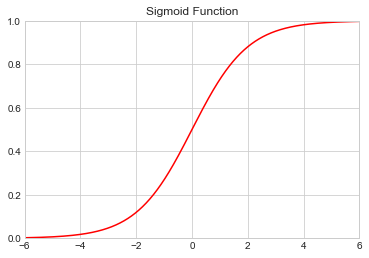

In [83]:
x = np.linspace(-6,6,1000)
y = 1.0/(1.0+np.exp(-1.0 * x))

plt.plot(x,y,c='r')
plt.title('Sigmoid Function')
plt.xlim(-6,6)
plt.ylim(0,1)

In [84]:
#fair is the affair dataset. Link to details : http://www.statsmodels.org/stable/datasets/generated/fair.html
d = sm.datasets.fair.load_pandas().data  #load in pandas
d.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [85]:
#affairs column is time spent in affairs
##create a new column called 'Had Affair' : 1 if the affair>0 else 0
d['Had Affair'] = np.where(d.affairs>0,1,0)
d.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [86]:
d['Had Affair'].value_counts()

0    4313
1    2053
Name: Had Affair, dtype: int64

In [87]:
d.groupby('Had Affair').mean() #group the dataset according to the 'had affair' value

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


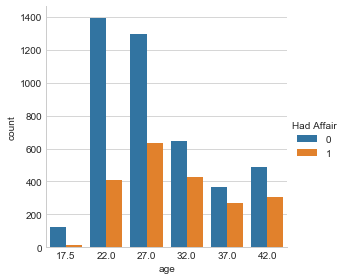

In [88]:
sns.factorplot('age',hue = 'Had Affair', data = d ,kind = 'count')

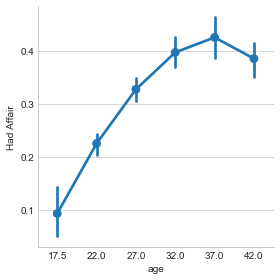

In [89]:
sns.factorplot('age','Had Affair',data=d)

(array([   0.,   13.,  406.,  633.,  425.,  270.,  306.,    0.]),
 array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 8 Patch objects>)

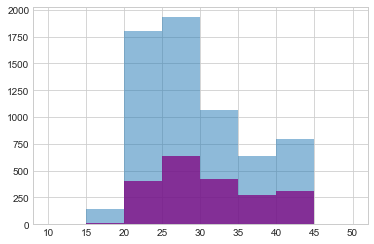

In [90]:
aff = d[d['Had Affair']==1].age
plt.hist(d.age,bins=np.linspace(10,50,9),alpha=0.5, rwidth=10)
plt.hist(aff,bins=np.linspace(10,50,9),alpha=0.75,rwidth=10,color='purple')


In [91]:
d.yrs_married.value_counts()

2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

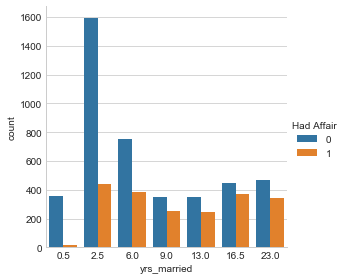

In [92]:
sns.factorplot('yrs_married',hue='Had Affair',data=d,kind='count')

In [93]:
d.yrs_married.unique()

array([  9. ,  13. ,   2.5,  16.5,  23. ,   6. ,   0.5])

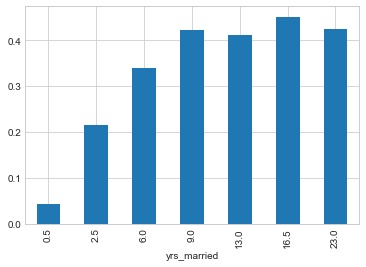

In [94]:
### Percentage of affair with yrs married
t = d.groupby('yrs_married').mean()
t['Had Affair'].plot(kind = 'bar')

#max percentage women who had affair were 16.5 years married

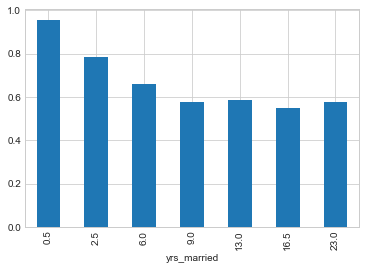

In [95]:
(1-t['Had Affair']).plot(kind = 'bar')

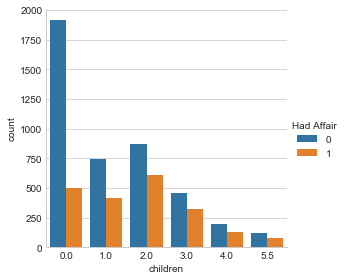

In [96]:
sns.factorplot('children',data=d,hue='Had Affair',kind='count')

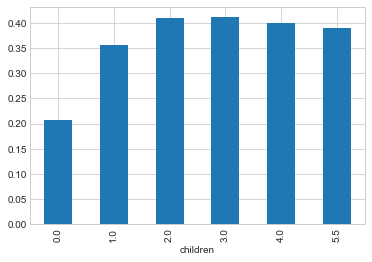

In [97]:
t = d.groupby('children').mean()
t['Had Affair'].plot(kind = 'bar')
##lesser children, lesser the probability of affairsns.factorplot('age','Had Affair',data=d)sns.factorplot('age','Had Affair',data=d)

# DATA PREPARATION - CREATING DUMMY VARIABLES OF CATEGORIAL DATA 

In [98]:
##create a dummy variable table for occ
col = ['occ'+str(i) for i in range(1,7)]
d1 = df(np.zeros((len(d),6)), columns = col)
d1.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
for i in range(0,len(d)):
    col = 'occ'+str(int(d.ix[i]['occupation']))
    d1[col][i] =1
d1.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,occ1,occ2,occ3,occ4,occ5,occ6
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
## creating a dummy dataframe usind pd.get_dummies

In [101]:
occ = pd.get_dummies(d['occupation']).rename(columns = {1.0:'occ1',2.0:'occ2',3.0:'occ3',4.0:'occ4',5.0:'occ5',6.0:'occ6'})
occ.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [102]:
hocc = pd.get_dummies(d['occupation_husb']).rename(columns = {1.0:'hocc1',2.0:'hocc2',3.0:'hocc3',4.0:'hocc4',5.0:'hocc5',6.0:'hocc6'})
hocc.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [ ]:
d.drop(['occupation','occupation_husb'], axis=1, inplace=True)

In [116]:
#d.drop(['occ1','occ2','occ3','occ4','occ5','occ6','hocc1','hocc2','hocc3','hocc4','hocc5','hocc6'],axis=1,inplace=True)

In [120]:
d = pd.concat([d,occ,hocc],axis=1)
d.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Had Affair,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,0,1,0,0,0,0,0,0,1,0,0


In [123]:
Y = d['Had Affair']
d.drop('Had Affair',axis=1,inplace=True)
d.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


# MULTI-COLLINEARITY CONSIDERATION

since the dummy variables are highly correlated, thus distorting our regression coefficients.
Thus we drop one variable each (occ1 and hocc1) to reduce multi-collinearity

In [124]:
d.drop(['occ1','hocc1'],axis =1, inplace=True)
d.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [134]:
d.drop('affairs',axis=1,inplace=True)
X=d
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

# LOGISTIC REGRESSION

In [136]:
clf = LogisticRegression()
clf.fit(X,Y)
clf.score(X,Y) ## accuracy score of fit : 73% i.e. 73% affairs predicted successfully

0.7260446120012567

In [142]:
coeff_df = df({'feature':d.columns})
coeff_df['coefficient'] = np.transpose(clf.coef_)
coeff_df

,feature,coefficient
0,rate_marriage,-0.697711
1,age,-0.056314
2,yrs_married,0.103842
3,children,0.018110
4,religious,-0.367958
5,educ,0.009078
6,occ2,0.293767
7,occ3,0.604537
8,occ4,0.341667
9,occ5,0.938913


In [141]:
clf.coef_

array([[-0.69771095, -0.05631404,  0.10384163,  0.01811031, -0.36795797,
         0.00907786,  0.29376688,  0.60453734,  0.34166698,  0.93891286,
         0.89469707,  0.23348618,  0.33732602,  0.2027202 ,  0.22557186,
         0.22854352]])

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
pred_Y = log_model2.predict(X_test)
print(metrics.accuracy_score(pred_Y,Y_test))

0.72675879397
